# Lab: Trees

Lab associated with Module: Trees

***

In [28]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/s1/w4ls_vks1632gqfx5vm1_4qc0000gn/T/ipykernel_30349/1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [29]:
!pip install numpy

In [30]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [31]:
!pip install graphviz
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [32]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

In [6]:
dot

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

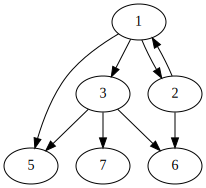

In [751]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [756]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None
        self.parent = None
        self.balance = 0
        self.height = 1


def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)

def updateHeightAndBalance(node):
    if not node:
        return 0
    node.height = 1 + max(getHeight(node.left), getHeight(node.right))
    node.balance = getBalance(node)
    return node.height

def getHeight(node):
    if not node:
        return 0
    return node.height

def getBalance(node):
    if not node:
        return 0
    return getHeight(node.left) - getHeight(node.right)
        
def binaryTree(nodes, start, end):
    if start > end:
        return None
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    updateHeightAndBalance(root)
    return root

In [757]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [758]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting

In [760]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [761]:
test3_tree = buildBinaryTree(test3)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [763]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

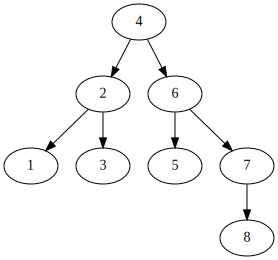

In [764]:
dot = visualize_tree(test1_tree)

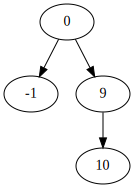

In [765]:
dot = visualize_tree(test2_tree)

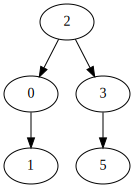

In [766]:
dot = visualize_tree(test3_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [771]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [772]:
search(test3_tree, 3)

True

In [773]:
search(test1_tree, 18)

False

Let us write insert function now:

In [775]:
def insert(nodes, val):
    if not nodes:
        return Node(val)

    if val < nodes.val:
        nodes.left = insert(nodes.left, val)
        if nodes.left:
            nodes.left.parent = nodes
    else:
        nodes.right = insert(nodes.right, val)
        if nodes.right:
            nodes.right.parent = nodes

    updateHeightAndBalance(nodes)
    return nodes

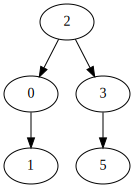

In [776]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

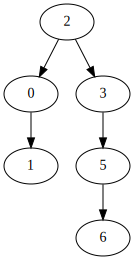

In [777]:
test3_tree = insert(test3_tree, 6)
dot = visualize_tree(test3_tree)

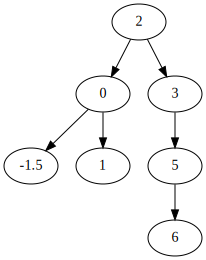

In [778]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

In [780]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):
    if not nodes:
        return nodes

    if val < nodes.val:
        nodes.left = delete(nodes.left, val)
        if nodes.left:
            nodes.left.parent = nodes
    elif val > nodes.val:
        nodes.right = delete(nodes.right, val)
        if nodes.right:
            nodes.right.parent = nodes
    else:
        if nodes.left is None:
            temp = nodes.rightl
            if temp:
                temp.parent = nodes.parent
            return temp
        elif nodes.right is None:
            temp = nodes.left
            if temp:
                temp.parent = nodes.parent
            return temp

        temp = minValueNode(nodes.right)
        nodes.val = temp.val
        nodes.right = delete(nodes.right, temp.val)
        if nodes.right:
            nodes.right.parent = nodes

    updateHeightAndBalance(nodes)
    return nodes

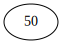

In [781]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

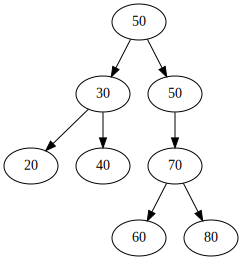

In [782]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

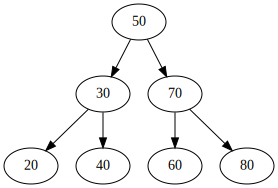

In [783]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write down code for activities in the onTrack Task sheet, in the following section </font>

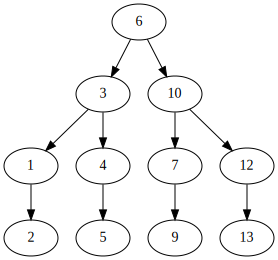

In [786]:
### TODO ###
### Good Luck ###

def isBalanced(node):
    if not node:
        return True
    if abs(node.balance) > 1:
        return False
    return isBalanced(node.left) and isBalanced(node.right)

test4 = [2, 1, 12, 5, 9, 10, 3, 6, 7, 4, 13]
test4 = np.unique(test4)

test4_tree = buildBinaryTree(test4)
dot = visualize_tree(test4_tree)




In [787]:
#Q2

def findLCA(root, n1, n2):
    # Base case
    if root is None:
        return None

    # If either n1 or n2 matches with root's key, report the presence
    if root.val == n1.val or root.val == n2.val:
        return root

    # Look for keys in left and right subtrees
    left_lca = findLCA(root.left, n1, n2)
    right_lca = findLCA(root.right, n1, n2)

    # If both of the above calls return Non-NULL, then one key
    # is present in one subtree and other is present in other,
    # So this node is the LCA
    if left_lca and right_lca:
        return root

    # Otherwise check if left subtree or right subtree is LCA
    return left_lca if left_lca is not None else right_lca

In [788]:
def findNode(root, val):
    # Helper function to find the node with the given value
    if root is None or root.val == val:
        return root
    if val < root.val:
        return findNode(root.left, val)
    return findNode(root.right, val)

In [789]:
node1 = findNode(test4_tree, 12)
node2 = findNode(test4_tree, 7)

lca = findLCA(test4_tree, node1, node2)
if lca:
    print(f"LCA of {node1.val} and {node2.val} is {lca.val}")
else:
    print("LCA not found")

LCA of 12 and 7 is 10


In [790]:
def leftRotate(root):
    x = root
    y = x.right
    if not y:
        return root

    x.right = y.left
    if y.left:
        y.left.parent = x

    y.parent = x.parent
    if not x.parent:
        root = y  # Update root if necessary
    elif x == x.parent.left:
        x.parent.left = y
    else:
        x.parent.right = y

    y.left = x
    x.parent = y

    # Update height and balance factors
    updateHeightAndBalance(x)
    updateHeightAndBalance(y)

    return root

In [791]:
def rightRotate(root):
    y = root
    x = y.left
    if not x:
        return root

    y.left = x.right
    if x.right:
        x.right.parent = y

    x.parent = y.parent
    if not y.parent:
        root = x  # Update root if necessary
    elif y == y.parent.right:
        y.parent.right = x
    else:
        y.parent.left = x

    x.right = y
    y.parent = x

    # Update height and balance factors
    updateHeightAndBalance(y)
    updateHeightAndBalance(x)

    return root

In [792]:
def balanceTree(node):
    if not node:
        return node

    # Check balance factor and perform rotations if needed
    if node.balance > 1:  # Left-heavy
        if node.left and node.left.balance < 0:
            # Left-Right Case
            node.left = leftRotate(node.left)
        # Left-Left Case
        node = rightRotate(node)

    elif node.balance < -1:  # Right-heavy
        if node.right and node.right.balance > 0:
            # Right-Left Case
            node.right = rightRotate(node.right)
        # Right-Right Case
        node = leftRotate(node)

    return node

In [793]:
def getHeight(node):
    if not node:
        return 0
    return node.height

def updateHeightAndBalance(node):
    if not node:
        return
    node.height = 1 + max(getHeight(node.left), getHeight(node.right))
    node.balance = getHeight(node.left) - getHeight(node.right)

def leftRotate(x):
    y = x.right
    T2 = y.left

    # Perform rotation
    y.left = x
    x.right = T2

    # Update parents
    y.parent = x.parent
    x.parent = y
    if T2:
        T2.parent = x

    # Update heights
    updateHeightAndBalance(x)
    updateHeightAndBalance(y)

    return y

def rightRotate(y):
    x = y.left
    T2 = x.right

    # Perform rotation
    x.right = y
    y.left = T2

    # Update parents
    x.parent = y.parent
    y.parent = x
    if T2:
        T2.parent = y

    # Update heights
    updateHeightAndBalance(y)
    updateHeightAndBalance(x)

    return x

def balanceTree(node):
    # Left heavy
    if node.balance > 1:
        if node.left.balance < 0:
            node.left = leftRotate(node.left)
        return rightRotate(node)

    # Right heavy
    if node.balance < -1:
        if node.right.balance > 0:
            node.right = rightRotate(node.right)
        return leftRotate(node)

    return node

In [794]:
def insert(root, val):
    if not root:
        return Node(val)

    # Insert the node into the appropriate subtree
    if val < root.val:
        root.left = insert(root.left, val)
        if root.left:
            root.left.parent = root
    else:
        root.right = insert(root.right, val)
        if root.right:
            root.right.parent = root

    # Update height and balance factors of the current node
    updateHeightAndBalance(root)

    # Balance the tree if needed
    return balanceTree(root)

In [795]:
def delete(root, val):
    if not root:
        return root

    if val < root.val:
        root.left = delete(root.left, val)
        if root.left:
            root.left.parent = root
    elif val > root.val:
        root.right = delete(root.right, val)
        if root.right:
            root.right.parent = root
    else:
        if not root.left:
            temp = root.right
            if temp:
                temp.parent = root.parent
            return temp
        elif not root.right:
            temp = root.left
            if temp:
                temp.parent = root.parent
            return temp

        temp = minValueNode(root.right)
        root.val = temp.val
        root.right = delete(root.right, temp.val)
        if root.right:
            root.right.parent = root

    updateHeightAndBalance(root)
    return balanceTree(root)

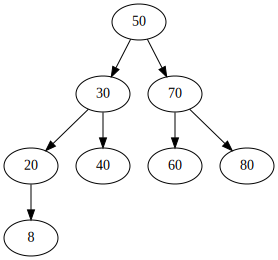

In [796]:
test3_tree = insert(test3_tree, 8)
dot = visualize_tree(test3_tree)

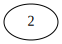

In [797]:
Q4 = [2]
Q4 = np.unique(Q4)

Q4 = buildBinaryTree(Q4)
dot = visualize_tree(Q4)

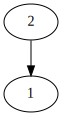

In [798]:
Q4 = insert(Q4, 1)
dot = visualize_tree(Q4)

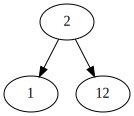

In [799]:
Q4 = insert(Q4, 12)
dot = visualize_tree(Q4)

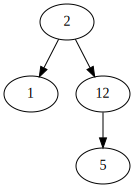

In [800]:
Q4 = insert(Q4, 5)
dot = visualize_tree(Q4)

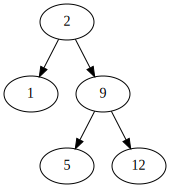

In [801]:
Q4 = insert(Q4, 9)
dot = visualize_tree(Q4)

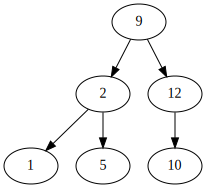

In [802]:
Q4 = insert(Q4, 10)
dot = visualize_tree(Q4)

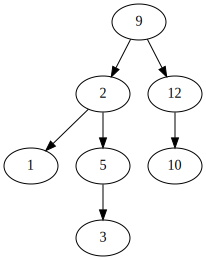

In [803]:
Q4 = insert(Q4, 3)
dot = visualize_tree(Q4)

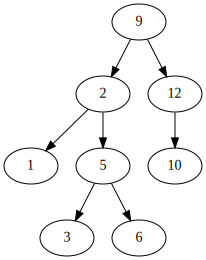

In [804]:
Q4 = insert(Q4, 6)
dot = visualize_tree(Q4)

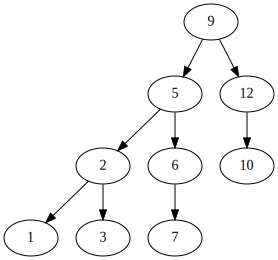

In [805]:
Q4 = insert(Q4, 7)
dot = visualize_tree(Q4)

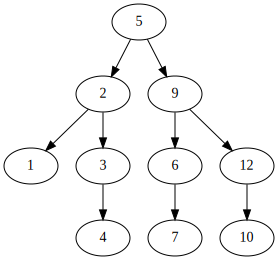

In [806]:
Q4 = insert(Q4, 4)
dot = visualize_tree(Q4)

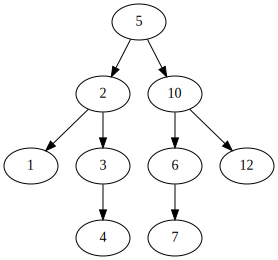

In [807]:
Q4 = delete(Q4, 9)
dot = visualize_tree(Q4)

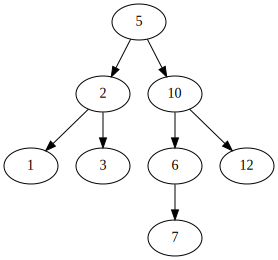

In [808]:
Q4 = delete(Q4, 4)
dot = visualize_tree(Q4)

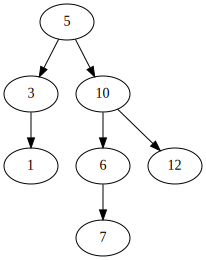

In [809]:
Q4 = delete(Q4, 2)
dot = visualize_tree(Q4)